# What would happen to the Russian economy under heavy sanctions?

Russian economy is very dependent on selling Crude Oil and Natural Gas.

Economic sanctions decreased Russia's ability to export Oil and Gas. Prices are affected as well.

Let's find if it's true and what would happen to the Russia's GDP in case of low Oil and Gas prices.

Due to the lack of Data on the Interet, I had to create my own Dataset.

Used Data from:
1. statista.com
2. investing.com
3. macrotrends.net
4. divercitytimes.com

Columns:
1. year (from 1997 to 2022)

2. oil_price (average price of **Crude Oil Brent** for the whole year) per barrel in Nominal US $

3. gas_price (**Natural Gas** Price) in Europe in Nominal US $

4. GDP (Gross domestic product) in trillion US $


In [122]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [123]:
# Loading Dataset
ds = pd.read_csv('russia_GDP_oil_gas.csv')

In [124]:
ds.head(5)

,year,oil_price,gas_price,GDP
0,1997,19.10,2.74,433.70
1,1998,12.80,2.42,287.67
2,1999,17.90,2.13,209.66
3,2000,28.40,3.86,278.26
4,2001,24.45,4.06,328.48


In [125]:
ds.tail(5)

,year,oil_price,gas_price,GDP
21,2018,71.34,7.68,1653.01
22,2019,64.30,4.80,1695.72
23,2020,41.96,3.24,1488.12
24,2021,70.86,16.12,1836.63
25,2022,100.93,40.34,2215.29


# Data Preprocessing

In [126]:
# data["column_name"]=data["column_name"].str.replace(',','.')
#ds['oil_price'] = ds['oil_price'].str.replace(',', '.')
#ds['gas_price'] = ds['gas_price'].str.replace(',', '.')
#ds['GDP'] = ds['GDP'].str.replace(',', '.')

In [127]:
ds.head(5)

,year,oil_price,gas_price,GDP
0,1997,19.10,2.74,433.70
1,1998,12.80,2.42,287.67
2,1999,17.90,2.13,209.66
3,2000,28.40,3.86,278.26
4,2001,24.45,4.06,328.48


Text(0.5, 1.0, 'GDP and Oil prices correlation')

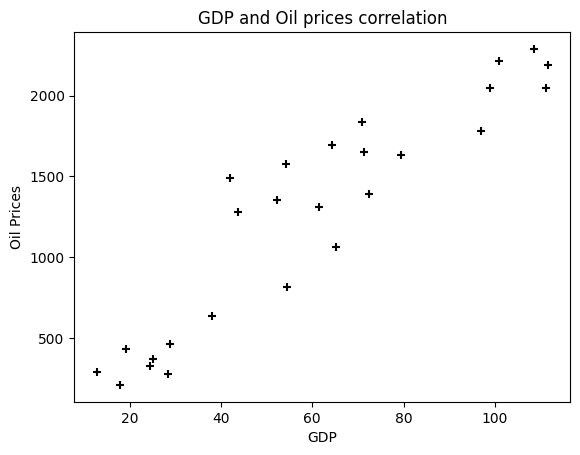

In [128]:
# Visualization of Data (GDP and Oil prices)
plt.scatter(ds.oil_price, ds.GDP, color='black', marker='+')
plt.xlabel('GDP')
plt.ylabel('Oil Prices')
plt.title('GDP and Oil prices correlation')

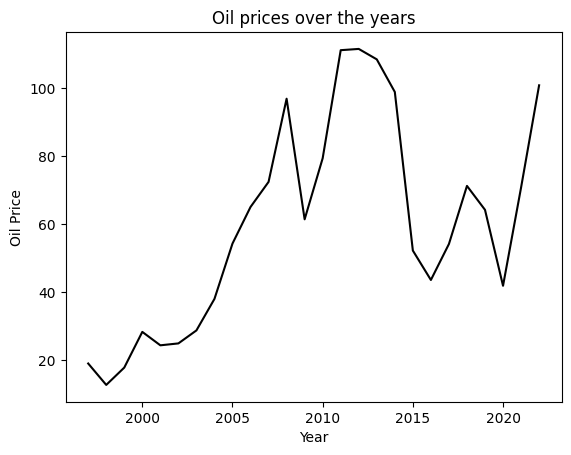

In [145]:
# Oil prices over the years
plt.plot(ds.year, ds.oil_price, color='black')

plt.xlabel('Year')
plt.ylabel('Oil Price')
plt.title('Oil prices over the years')

plt.show()

Text(0.5, 1.0, 'GDP and Natural gas prices correlation')

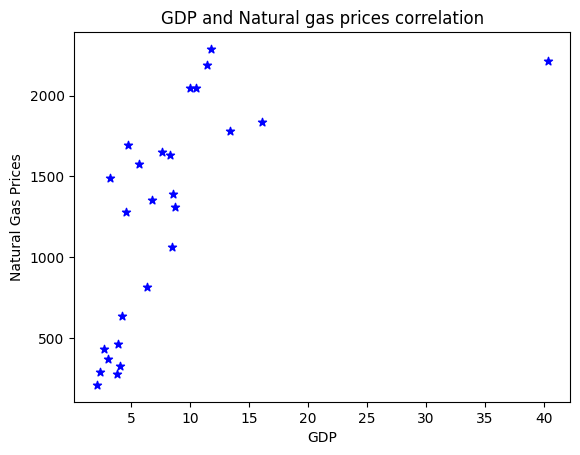

In [129]:
# Visualization of Data (GDP and Natural Gas prices)
plt.scatter(ds.gas_price, ds.GDP, color='blue', marker='*')
plt.xlabel('GDP')
plt.ylabel('Natural Gas Prices')
plt.title('GDP and Natural gas prices correlation')

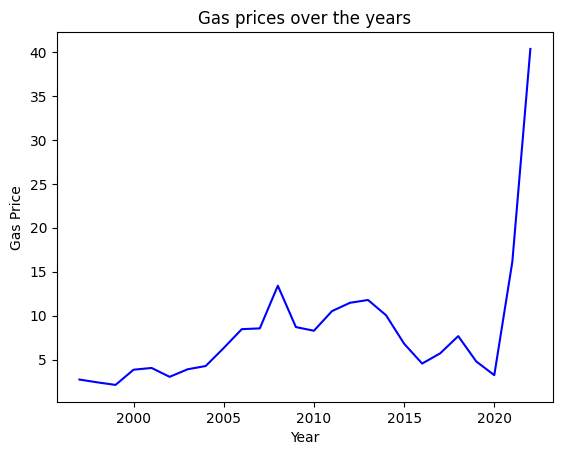

In [146]:
# Gas prices over the years
plt.plot(ds.year, ds.gas_price, color='blue')

plt.xlabel('Year')
plt.ylabel('Gas Price')
plt.title('Gas prices over the years')

plt.show()

# Model Creation

In this example, I use scikit-learn to perform linear regression.

As I have multiple feature variables and a single outcome variable, it’s a Multiple linear regression.

In [130]:
# Prepare the feature matrix X by combining the two feature variables
X_train = np.column_stack((ds.oil_price, ds.gas_price))

In [131]:
# Model creation
regression = linear_model.LinearRegression()

In [132]:
# Training the model
regression.fit(X_train, ds.GDP)

LinearRegression()

In [133]:
print("Coefficients:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficients: [19.96570039  3.93388291]
Intercept: 30.483409497435105


In [134]:
# What would happen with Russian economy with oil prices 50 and Natural Gas price is 4
Oil_test = 50
Gas_test = 4
X_test = np.column_stack((Oil_test, Gas_test))

In [135]:
regression.predict(X_test)

array([1044.50396065])

In this scenario (oil prices 50 and Natural Gas price is 4) the Russian GDP would shrink to a little bit more than $1 trillion USD.

Right now it is a little over $2 trillion USD.


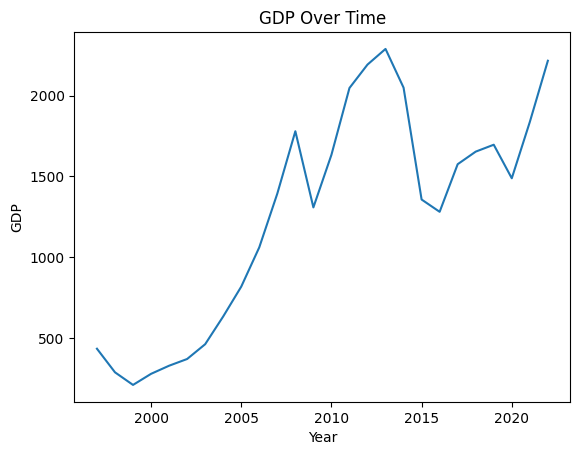

In [136]:
plt.plot(ds.year, ds.GDP)

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Over Time')

plt.show()

In [157]:
# What would happen with Russian economy with oil prices 95 and Natural Gas price is 20
Oil_test = 95
Gas_test = 20
X_test = np.column_stack((Oil_test, Gas_test))

In [156]:
regression.predict(X_test)

array([2005.9026048])

As we can see, with oil prices at 90 and natural gas prices at 20 Russian economy is able to stay at the current level of GDP (over $2 trillion)

# Conclusion

Indeed, the Russian economy is heavily dependent on Gas and Oil exporting. Low prices affect the GDP a lot.